In [ ]:
import numpy as np # linear algebra
import pandas as pd 
pd.get_option("display.max_columns")
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images
import time # timer
import random

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data_file = 'gdrive/MyDrive/Data Project/files/6_predictions.csv'

# Use Pandas to read CSV file
df = pd.read_csv(data_file)

# Trim to 1,000 rows
df = df.iloc[:1000]

# Add column names
df.columns=['Predicted','Actual','Orig Image', 'Greyscale Histogram Transformed']

In [ ]:
# Convert image data and histogram data into list of floats 
# Since Pandas initially imports each of the sublists as a string 
import re
def conv_float(df_row):
  new_list = []
  for i in df_row.split(','):
    i = re.sub('[^0-9.]', '', i)
    new_list.append(float(i))
  return new_list

df['Orig Image'] = df['Orig Image'].apply(lambda x: conv_float(x))
df['Greyscale Histogram Transformed'] = df['Greyscale Histogram Transformed'].apply(lambda x: conv_float(x))

In [ ]:
# Convert labels (imported as floats) into strings
def conv_labels(label_float):
  label_dict = {0.0: 'Barren', 1.0: 'Trees', 2.0: 'Grassland', 3.0: 'Other'}
  return label_dict[label_float]

df['Actual'] = df['Actual'].apply(lambda x: conv_labels(x))
df['Predicted'] = df['Predicted'].apply(lambda x: conv_labels(x))

In [ ]:
# Convert image data into an RGB image that can be displayed
def to_rgb_img(from_list):
  new_array = np.reshape(from_list, (784,4))
  out_list = []
  for row in new_array:
    for i in range(3):
      out_list.append(row[i])
  out_list = np.reshape(out_list,(28,28,3))
  return np.array(out_list, 'uint8')

df['Orig Image'] = df['Orig Image'].apply(lambda x: to_rgb_img(x))

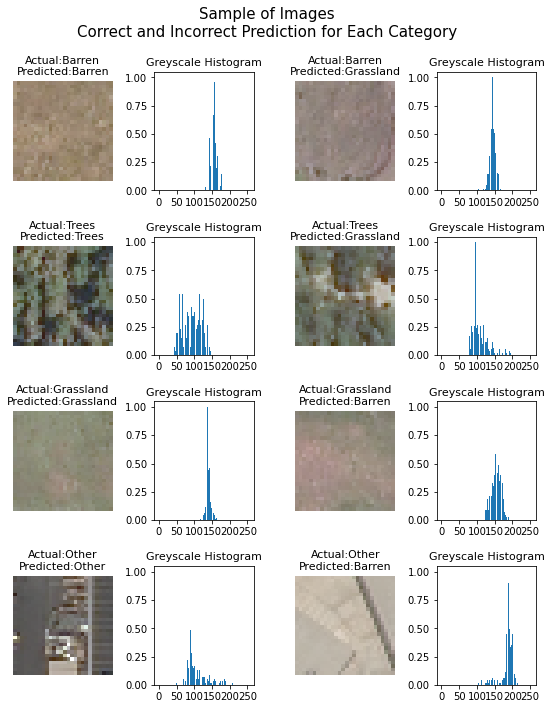

In [ ]:
######################################################################################
##  Display subplots of images (with predictions & labels), and histogram features  ##
######################################################################################

# Initialize a list of which images to use
img_list = [522, 110, 843, 583, 948, 382, 313, 626]
dat = df['Greyscale Histogram Transformed'].iloc[img_list[1]]

n_cols = 4
n_rows = 4 

# Setup subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(8,10))
fig.tight_layout(h_pad=3)

# Main plot title
fig.suptitle('Sample of Images\nCorrect and Incorrect Prediction for Each Category', fontsize=15)
plt.subplots_adjust(top=.89)

# Fontsize of subplot titles
plt.rc('axes', titlesize=11) 

# Iterate through each set (of image and histogram) and plot
image_idx = 0
for i in range(n_rows):
  for j in range(0,n_cols, 2):
    image = df['Orig Image'].iloc[img_list[image_idx]]
    ax[i, j].imshow(image)
    ax[i, j].set_title('Actual:' + str(df['Actual'].iloc[img_list[image_idx]]) + '\n' + 'Predicted:' + str(df['Predicted'].iloc[img_list[image_idx]]))
    ax[i, j].axis('off')

    dat = df['Greyscale Histogram Transformed'].iloc[img_list[image_idx]]
    ax[i, j+1].bar(range(0,256), dat)
    ax[i, j+1].set_xticks(np.arange(0,256,50))
    ax[i, j+1].set_title('Greyscale Histogram');

    image_idx += 1

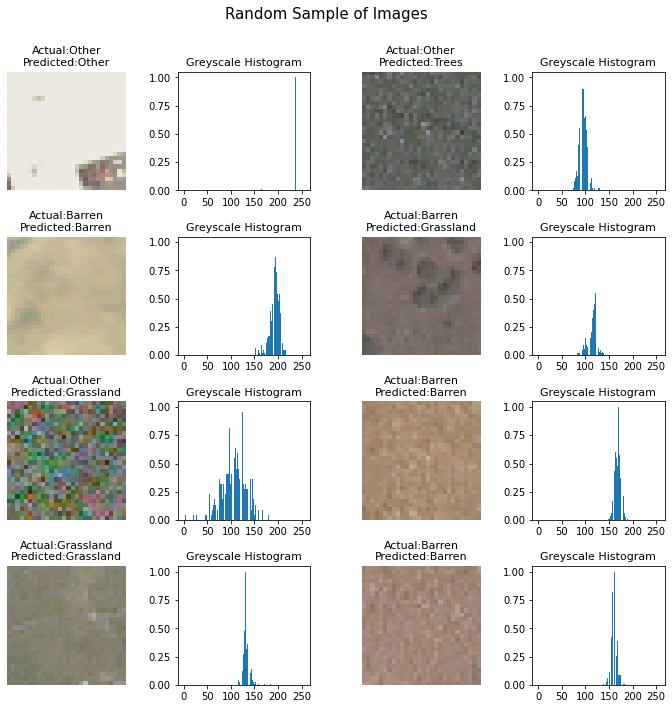

In [ ]:
########################################################################################################
##  Display RANDOMLY SELECTED subplots of images (with predictions & labels), and histogram features  ##
########################################################################################################

# Initialize a list of 10 random numbers from 1-1000 
img_list = [random.randrange(1,1000) for i in range(10)]
dat = df['Greyscale Histogram Transformed'].iloc[img_list[1]]

n_cols = 4
n_rows = 4 

# Setup subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10,10))
fig.tight_layout(h_pad=3)

# Main plot title
fig.suptitle('Random Sample of Images', fontsize=15)
plt.subplots_adjust(top=.89)

# Fontsize of subplot titles
plt.rc('axes', titlesize=11) 

# Iterate through each set (of image and histogram) and plot
image_idx = 0
for i in range(n_rows):
  for j in range(0,n_cols, 2):
    image = df['Orig Image'].iloc[img_list[image_idx]]
    ax[i, j].imshow(image)
    ax[i, j].set_title('Actual:' + str(df['Actual'].iloc[img_list[image_idx]]) + '\n' + 'Predicted:' + str(df['Predicted'].iloc[img_list[image_idx]]))
    ax[i, j].axis('off')

    dat = df['Greyscale Histogram Transformed'].iloc[img_list[image_idx]]
    ax[i, j+1].bar(range(0,256), dat)
    ax[i, j+1].set_xticks(np.arange(0,256,50))
    ax[i, j+1].set_title('Greyscale Histogram');

    image_idx += 1